# Hands-On: Association Rules in Python – Groceries Example

In [2]:
!pip install matplotlib
!pip install seaborn
!pip install mlxtend
!pip install --upgrade pip


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\HP\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import time
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('C:/Users/HP/Desktop/PORTO BUSINESS SCHOOL/DESCRIPTIVE ANALYTICS/CLASS 2/groceries.csv')

In [15]:
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [16]:
df.isnull().sum()  

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [17]:
df['itemDescription'].nunique()

167

In [18]:
item_freq = df['itemDescription'].value_counts() 
item_freq

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

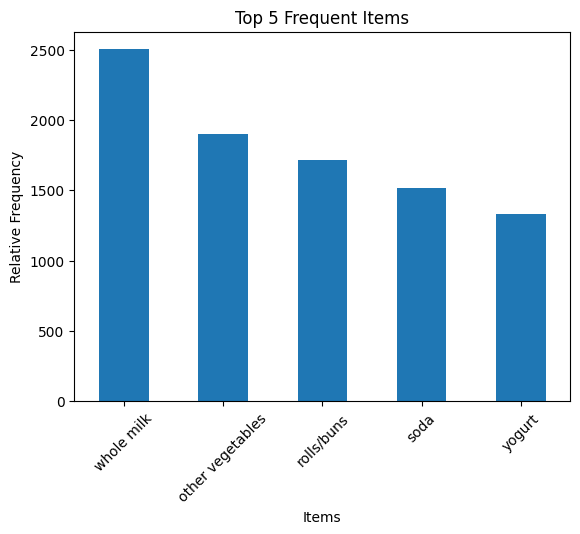

In [19]:
# Top 5 items
top5 = item_freq.head(5)
top5.plot(kind='bar')
plt.title('Top 5 Frequent Items')
plt.ylabel('Relative Frequency')
plt.xlabel('Items')
plt.xticks(rotation=45)
plt.show()

In [20]:
# group transactions by member and date
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)
transactions

Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
                                                   ...                        
4999           24-01-2015    [tropical fruit, berries, other vegetables, yo...
               26-12-2015                               [bottled water, herbs]
5000           09-03-2014                      [fruit/vegetable juice, onions]
               10-02-2015         [soda, root vegetables, semi-finished bread]
               16-11-2014                     [bottled beer, other vegetables]
Name: itemDescription, Length: 14963, dtype: object

In [21]:
len(transactions)

14963

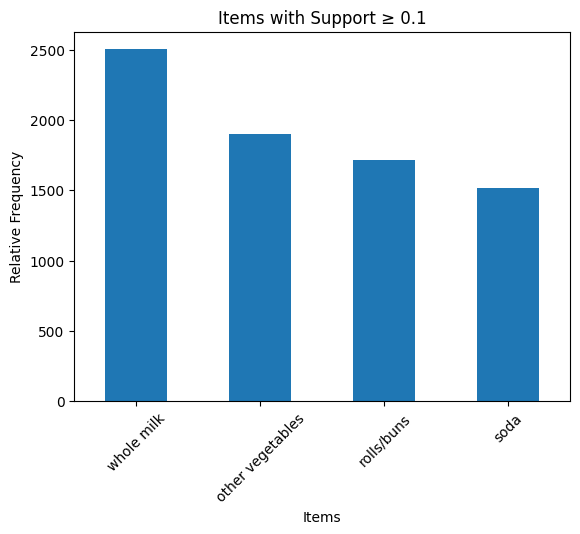

Number of items with support ≥ 0.1: 4


In [22]:
# Items that appear in, at least, 10% of the transactions
high_freq_items = item_freq[item_freq >= len(transactions) * 0.1]
high_freq_items.plot(kind='bar')
plt.title('Items with Support ≥ 0.1')
plt.ylabel('Relative Frequency')
plt.xlabel('Items')
plt.xticks(rotation=45)
plt.show()

print(f"Number of items with support ≥ 0.1: {len(high_freq_items)}")

In [23]:
transaction_sizes = transactions.apply(len)
transaction_sizes.describe()

count    14963.000000
mean         2.590724
std          1.117469
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: itemDescription, dtype: float64

In [24]:
# Encode the Transactions
te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_df = pd.DataFrame(transactions_matrix, columns=te.columns_)

encoded_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# Run apriori to get frequent itemsets
min_supp = 0.001
freq_itemsets = apriori(encoded_df, min_support=min_supp, use_colnames=True) 
print(f"Number of frequent itemsets: {len(freq_itemsets)}")

Number of frequent itemsets: 750


In [26]:
freq_itemsets.sort_values(by= "support",ascending=False)

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
...,...,...
162,0.001002,"(beef, canned beer)"
34,0.001002,(cooking chocolate)
105,0.001002,(ready soups)
725,0.001002,"(sugar, tropical fruit)"


In [27]:
# Frequent itemsets obtained by FP-Growth
freq_itemsets_fp = fpgrowth(encoded_df, min_support=0.001, use_colnames=True)
freq_itemsets_fp.sort_values(by= "support",ascending=False)

,support,itemsets
0,0.157923,(whole milk)
17,0.122101,(other vegetables)
13,0.110005,(rolls/buns)
9,0.097106,(soda)
1,0.085879,(yogurt)
...,...,...
271,0.001002,"(beef, canned beer)"
742,0.001002,"(cat food, tropical fruit)"
278,0.001002,"(domestic eggs, white bread)"
167,0.001002,"(other vegetables, semi-finished bread)"


In [28]:
# Top 10 itemsets by support
top10_itemsets = freq_itemsets.sort_values(by= "support",ascending=False).head(10)
print(top10_itemsets['itemsets'])

146          (whole milk)
90     (other vegetables)
109          (rolls/buns)
123                (soda)
147              (yogurt)
110     (root vegetables)
139      (tropical fruit)
10        (bottled water)
115             (sausage)
28         (citrus fruit)
Name: itemsets, dtype: object


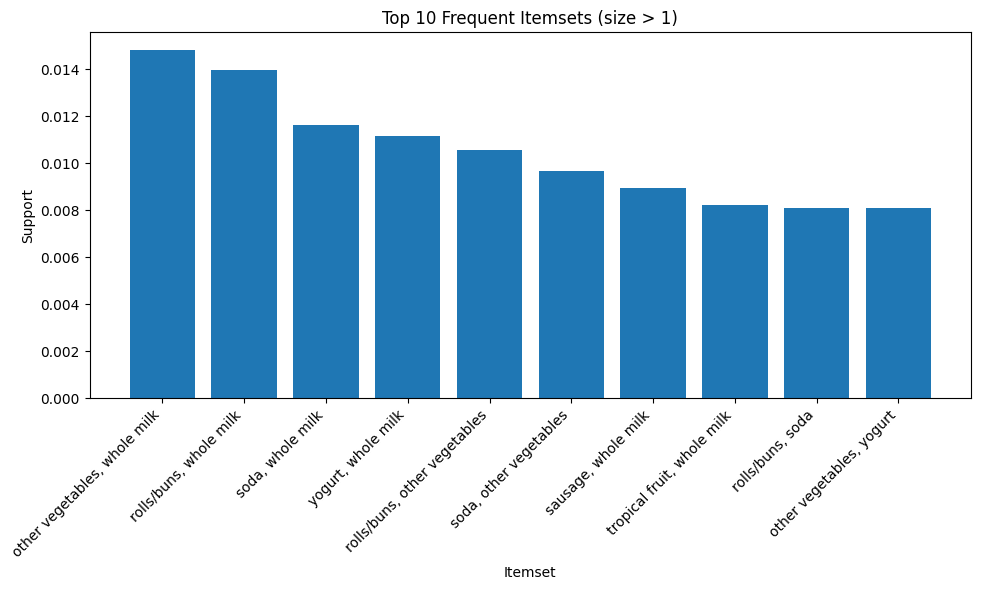

In [29]:
# Filter itemsets with more than 1 item
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
filtered = freq_itemsets[freq_itemsets['length'] > 1]

# Get top 10 by support
top10 = filtered.sort_values(by='support', ascending=False).head(10)

# Convert sets to strings for labeling
top10['itemset_str'] = top10['itemsets'].apply(lambda x: ', '.join(x))

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.bar(top10['itemset_str'], top10['support'])
plt.title("Top 10 Frequent Itemsets (size > 1)")
plt.xlabel("Itemset")
plt.ylabel("Support")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
#Generate association rules from frequent itemsets
min_conf=0.1
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=min_conf,num_itemsets=3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,1.0,-0.000473,0.975443,-0.184234,0.015130,-0.025175,0.058758
1,(UHT-milk),(whole milk),0.021386,0.157923,0.002540,0.118750,0.751949,1.0,-0.000838,0.955549,-0.252105,0.014367,-0.046519,0.067416
2,(beef),(whole milk),0.033950,0.157923,0.004678,0.137795,0.872548,1.0,-0.000683,0.976656,-0.131343,0.024991,-0.023902,0.083709
3,(berries),(other vegetables),0.021787,0.122101,0.002673,0.122699,1.004899,1.0,0.000013,1.000682,0.004984,0.018930,0.000681,0.072297
4,(berries),(whole milk),0.021787,0.157923,0.002272,0.104294,0.660414,1.0,-0.001168,0.940127,-0.344543,0.012806,-0.063686,0.059341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,1.0,0.000130,1.026642,0.122281,0.006568,0.025951,0.093273
126,"(sausage, whole milk)",(soda),0.008955,0.097106,0.001069,0.119403,1.229612,1.0,0.000200,1.025320,0.188423,0.010185,0.024695,0.065207
127,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
128,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650


In [31]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
127,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
120,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,1.0,0.000292,1.069304,0.258214,0.007007,0.064813,0.109847
125,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,1.0,0.000130,1.026642,0.122281,0.006568,0.025951,0.093273
99,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,1.0,0.000172,1.022008,0.103985,0.010081,0.021534,0.093318
123,"(rolls/buns, yogurt)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,1.0,0.000102,1.015701,0.076751,0.008130,0.015459,0.089702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,(hamburger meat),(other vegetables),0.021854,0.122101,0.002205,0.100917,0.826507,1.0,-0.000463,0.976438,-0.176685,0.015559,-0.024130,0.059490
84,(pip fruit),(rolls/buns),0.049054,0.110005,0.004946,0.100817,0.916483,1.0,-0.000451,0.989783,-0.087448,0.032090,-0.010323,0.072887
68,(pip fruit),(other vegetables),0.049054,0.122101,0.004946,0.100817,0.825688,1.0,-0.001044,0.976330,-0.181671,0.029755,-0.024244,0.070660
94,(soft cheese),(rolls/buns),0.010025,0.110005,0.001002,0.100000,0.909052,1.0,-0.000100,0.988884,-0.091784,0.008422,-0.011241,0.054557


Text(0, 0.5, 'Confidence')

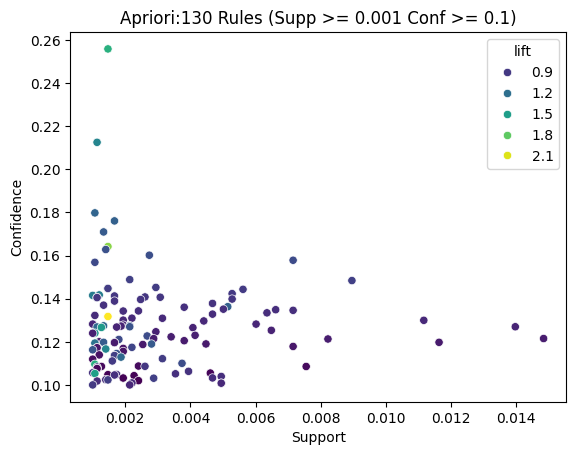

In [32]:
# Plot for Apriori
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift', palette='viridis')
plt.title(f'Apriori:{len(rules)} Rules (Supp >= {min_supp} Conf >= {min_conf})')
plt.xlabel('Support')
plt.ylabel('Confidence')

In [33]:
# Filter rules with lift > 1.5
high_lift_rules = rules[rules['lift'] > 1.5]
high_lift_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
127,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
128,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650
129,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,1.0,0.000797,1.082219,0.548014,0.020992,0.075973,0.078050
33,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,1.0,0.000408,1.046969,0.385385,0.013986,0.044862,0.062684
89,(processed cheese),(root vegetables),0.010158,0.069572,0.001069,0.105263,1.513019,1.0,0.000363,1.039891,0.342549,0.013594,0.038360,0.060316


In [34]:
filtered_rules = rules[
    (rules['lift'] > 1.5) &
    (rules['consequents'].apply(lambda x: 'whole milk' in x or 'yogurt' in x))
]
filtered_rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
128,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.00147,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650
127,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.00147,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562


In [35]:
freq_items = list(zip(freq_itemsets['itemsets'], freq_itemsets['support']))

# Closed itemsets: no superset with same support
closed_itemsets = []
for itemset, support in freq_items:
    is_closed = True
    for other_itemset, other_support in freq_items:
        if itemset < other_itemset and support == other_support:
            is_closed = False
            break
    if is_closed:
        closed_itemsets.append((itemset, support))

# Maximal itemsets: no frequent superset at all
maximal_itemsets = []
for itemset, support in freq_items:
    is_maximal = True
    for other_itemset, _ in freq_items:
        if itemset < other_itemset:
            is_maximal = False
            break
    if is_maximal:
        maximal_itemsets.append((itemset, support))

In [36]:
# Convert to DataFrames
closed_df = pd.DataFrame(closed_itemsets, columns=['itemsets', 'support'])
maximal_df = pd.DataFrame(maximal_itemsets, columns=['itemsets', 'support'])

# Preview results
print("Closed itemsets:\n", closed_df)
print("\nMaximal itemsets:\n", maximal_df)

Closed itemsets:
                               itemsets   support
0              (Instant food products)  0.004010
1                           (UHT-milk)  0.021386
2                   (abrasive cleaner)  0.001470
3                   (artif. sweetener)  0.001938
4                      (baking powder)  0.008087
..                                 ...       ...
745  (rolls/buns, sausage, whole milk)  0.001136
746     (rolls/buns, soda, whole milk)  0.001002
747   (rolls/buns, yogurt, whole milk)  0.001337
748        (soda, sausage, whole milk)  0.001069
749      (sausage, yogurt, whole milk)  0.001470

[750 rows x 2 columns]

Maximal itemsets:
                               itemsets   support
0              (Instant food products)  0.004010
1                   (abrasive cleaner)  0.001470
2                   (artif. sweetener)  0.001938
3                      (baking powder)  0.008087
4                   (bathroom cleaner)  0.001136
..                                 ...       ...
659  (r